# Library Imports

In [1]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data.dataloader import DataLoader
from collections import Counter

# Cifar Data Set Download

In [2]:
train= CIFAR10(root='data/', download=True, transform=ToTensor())
test = CIFAR10(root='data/', train=False, transform=ToTensor())

Files already downloaded and verified


# Length of Train and Test Data, Number of Samples

In [3]:
train_size = len(train)
test_size = len(test)
print("Train Data -",train_size," ","Test Data -",test_size)

Train Data - 50000   Test Data - 10000


# Different Classes or Labels in Cifar Data

Looks to be a mix of Automobile, Animals

In [4]:
classes = train.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Mean and Standar Deviation of Train Data

will help us Normalize when modeling

In [5]:
print(train.data.mean(axis=(0,1,2))/255)
print(train.data.std(axis=(0,1,2))/255)

[0.49139968 0.48215841 0.44653091]
[0.24703223 0.24348513 0.26158784]


# Class Balance

Images are equally distributed across classes

In [6]:
train_classes = []
for img, label in train:
    train_classes.append(label)

test_classes = []
for img, label in test:
    test_classes.append(label)

Counter(train_classes)

Counter({6: 5000,
         9: 5000,
         4: 5000,
         1: 5000,
         2: 5000,
         7: 5000,
         8: 5000,
         3: 5000,
         5: 5000,
         0: 5000})

In [7]:
Counter(test_classes)

Counter({3: 1000,
         8: 1000,
         0: 1000,
         6: 1000,
         1: 1000,
         9: 1000,
         5: 1000,
         7: 1000,
         4: 1000,
         2: 1000})

# shape of an image

In [8]:
img, label = train[0]
img_shape = img.shape
img_shape

torch.Size([3, 32, 32])

# To check if all image are of simlilar size

Looks like all images are of same size, no necessity for Resizing

In [9]:
train_loader = DataLoader(dataset=train, batch_size=1,shuffle=False,
                             num_workers=2)

img_shape = []
for data,label in train_loader:
    img_shape.append(torch.tensor(data.size()).tolist())

from collections import Counter
Counter([tuple(i) for i in img_shape])

Counter({(1, 3, 32, 32): 50000})

# To check if all images are RGB

SOme images are in grayscale

In [21]:
class_dict = {}

for i, classs in enumerate(classes):
  images_list = [index for index, (image, label) in enumerate(train) if label == i]
  class_dict[classs] = np.random.choice(images_list, 5, replace = False)

In [22]:
class_dict

{'airplane': array([32934, 21248,  9379, 41882, 11356]),
 'automobile': array([ 2037,  7176, 22422, 27989, 17950]),
 'bird': array([24904, 22676,  3569,  9757, 46874]),
 'cat': array([18684,  7460, 30479, 25256, 47062]),
 'deer': array([41688, 21779,  3736, 35072, 10890]),
 'dog': array([40114, 14259, 37623, 39176, 36354]),
 'frog': array([46306, 12885,  9850, 16863, 38020]),
 'horse': array([ 8927, 18268, 34506, 34631, 30032]),
 'ship': array([16988,  9567, 35938, 15914, 22589]),
 'truck': array([41906,   322,  1725, 23242,  3895])}

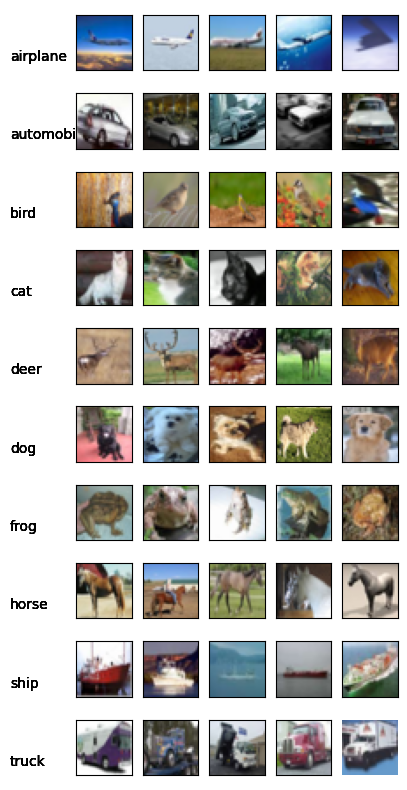

In [50]:
fig, axes = plt.subplots(ncols=6, nrows=10, figsize=(5, 10))
index = 0
for i, classlabel in enumerate(classes):
    for j in range(1, 6):
      axes[i][0].text(x = 0, y = 0.3, s = classlabel, rotation = 0, va = "center_baseline")
      axes[i,j].imshow(np.transpose(train[class_dict[classlabel][j-1]][0].numpy(), (1,2,0)))
      axes[i,j].get_xaxis().set_visible(False)
      axes[i,j].get_yaxis().set_visible(False)
      axes[i][0].get_xaxis().set_visible(False)
      axes[i][0].get_yaxis().set_visible(False)
      axes[i][0].spines['top'].set_visible(False)
      axes[i][0].spines['right'].set_visible(False)
      axes[i][0].spines['bottom'].set_visible(False)
      axes[i][0].spines['left'].set_visible(False)
      index += 1
plt.axis('off')
plt.show()